Synthesized fluxes to validate ngboost and GZ mthods. Here we provide a comparison with the real distribution.

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
import xarray as xr
base = '/Users/jwu/Work/Code/mlflux/data/'
ds = xr.load_dataset(base+'PSD/fluxes_all_cruises_compilation.nc')
psd = ds.dropna(dim="time", how="any", 
                subset=['taucx','taucy','hsc','hlc','U','tsnk','ta','qa'])

Text(0.5, 0, '$T_a - T_o$')

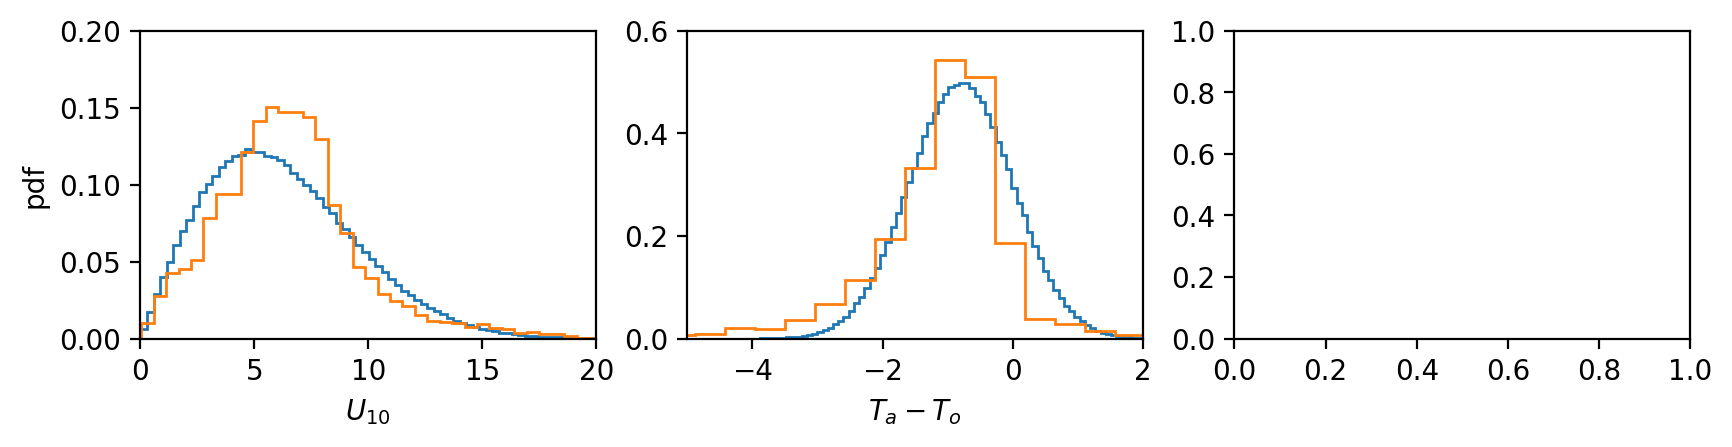

In [4]:
fig, axes = plt.subplots(1, 3, figsize=[10,2], dpi=200)
N = 1000000

# https://numpy.org/doc/stable/reference/random/generated/numpy.random.rayleigh.html
scale = 5.
x1 = np.random.rayleigh(scale, N)
ax = axes[0]
ax.hist(x1, bins=100, density=True, histtype='step')
ax.hist(psd.U, bins=40, density=True, histtype='step')
ax.set_xlim([0,20]); ax.set_ylim([0,0.2]); ax.set_xlabel('$U_{10}$'); ax.set_ylabel('pdf')

mean, var = -0.8, 0.8
x2 = np.random.normal(mean, var, N)
ax = axes[1]
ax.hist(x2, bins=100, density=True, histtype='step')
ax.hist(psd.ta-psd.tsnk, bins=40, density=True, histtype='step')
ax.set_xlim([-5,2]); ax.set_ylim([0,0.6]); ax.set_xlabel('$T_a - T_o$')

ax = axes[2]
ax.set_ylabel('rh')

Points before and after removing extremes: 10079 and 10056
Ch mean 1.221, std 4.427


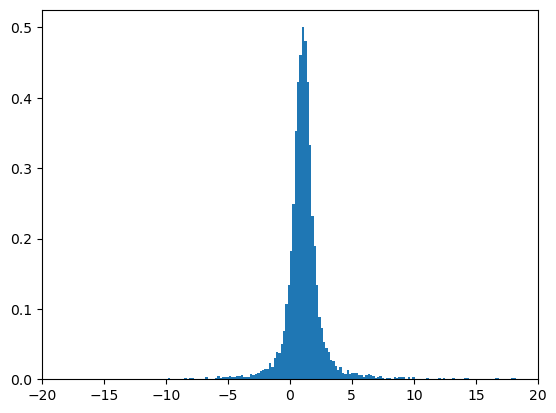

In [66]:
# Visualize the sensible heat coefficient
# There are some crazy outliers 
Ch_psd = -psd.hsc/(psd.U+0.000001)/(psd.ta-psd.tsnk+0.000001) # Notice the sign in front of hsc 
Ch_psd_lim = Ch_psd.where(np.abs(Ch_psd)<100, drop=True)
print('Points before and after removing extremes: %g and %g' %(len(Ch_psd.values), len(Ch_psd_lim.values)))
print('Ch mean %.3f, std %.3f' %(Ch_psd_lim.mean(), Ch_psd_lim.std()))
plt.hist(Ch_psd_lim.values, bins=1000, density=True)
plt.xlim([-20,20]); plt.show()

Generate synthetic data

In [6]:
# Sample size
N = 10000

# Wind speed
scale = 5. 
x1 = np.random.rayleigh(scale, N)

# Temperature diff 
mean, var = -0.8, 0.8
x2 = np.random.normal(mean, var, N)

# Bulk coefficients
Cd = 0.0015 # Momentum, between 1e-3 to 2e-3
Ch = 1 # Sensible heat, this is after multiplied by heat capacity 
 
# Fluxes
tau_mean = Cd*x1**2 
tau_var = Cd*x1**2*0.2 + 0.01
tau = tau_mean + np.array([np.random.normal(0,var,1).squeeze() for var in tau_var]) # this is kind of inefficient
qh_mean = Ch*x1*x2 
qh_var = abs(Ch*x1*x2)*0.15 + 1
qh = qh_mean + np.array([np.random.normal(0,var,1).squeeze() for var in qh_var])

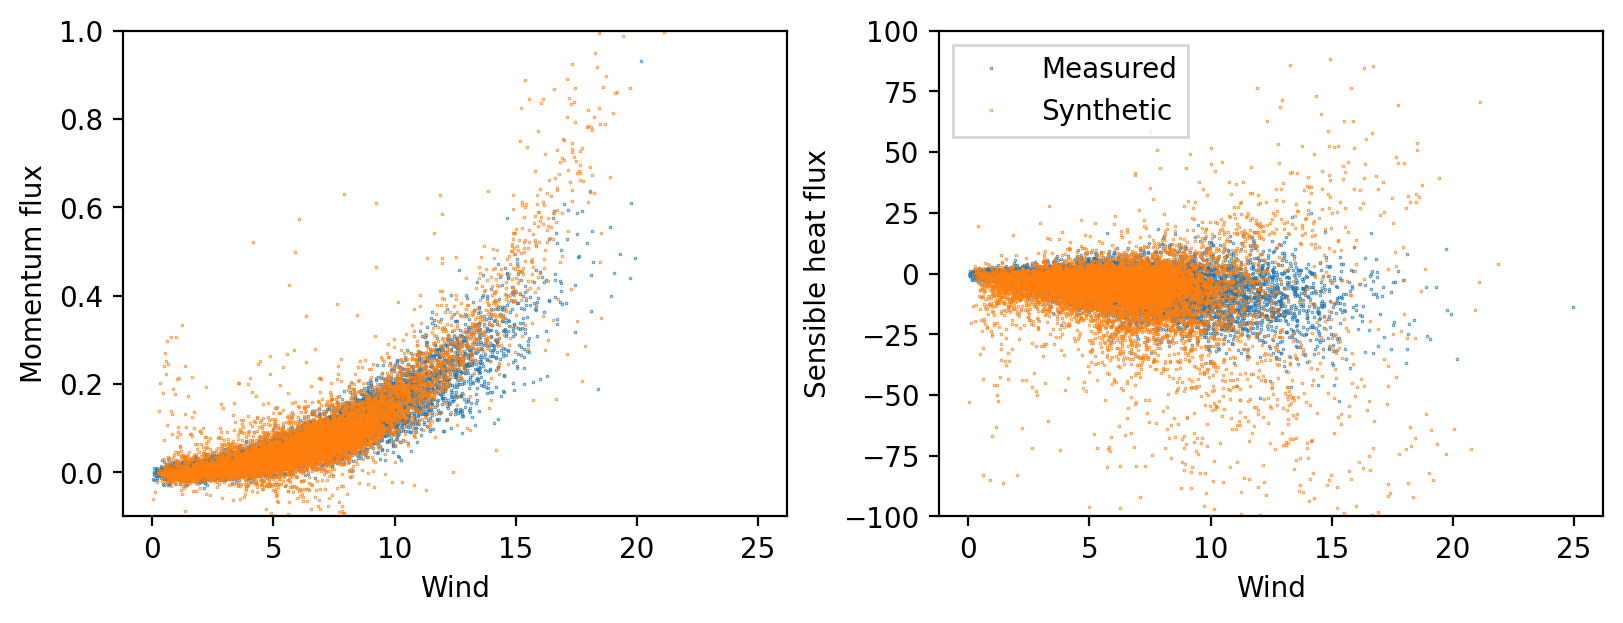

In [8]:
fig, axes = plt.subplots(1, 2, figsize=[8,3], dpi=200, constrained_layout=True)

ax = axes[0]
ax.plot(x1, tau, '.', markersize=0.5, label='Measured')
ax.plot(psd.U, psd.taucx, '.', markersize=0.5, label='Synthetic')
ax.set_ylim([-0.1,1]); ax.set_xlabel('Wind'); ax.set_ylabel('Momentum flux')

ax = axes[1]
ax.plot(x1, qh, '.', markersize=0.5, label='Measured')
ax.plot(psd.U, -psd.hsc, '.', markersize=0.5, label='Synthetic')
ax.set_ylim([-100,100]); ax.set_xlabel('Wind'); ax.set_ylabel('Sensible heat flux')

plt.legend(fancybox=False)

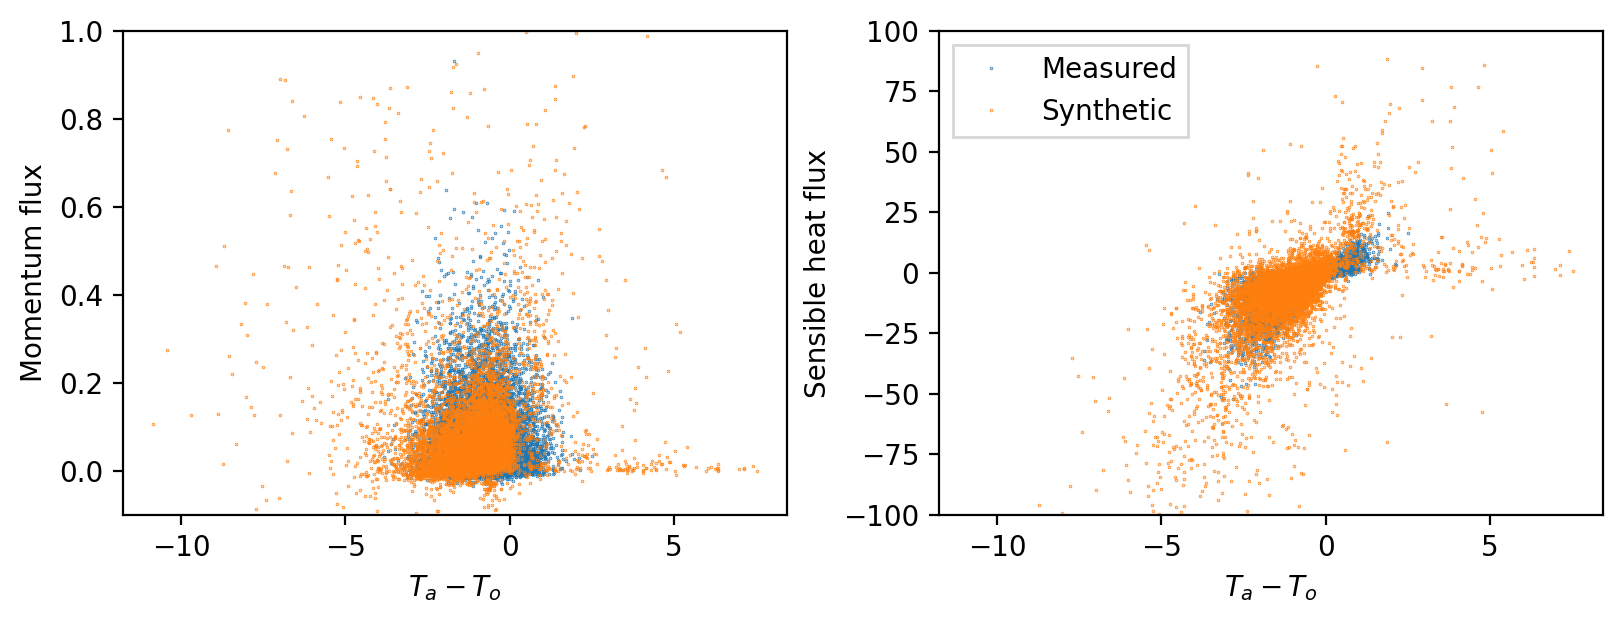

In [9]:
fig, axes = plt.subplots(1, 2, figsize=[8,3], dpi=200, constrained_layout=True)

ax = axes[0]
ax.plot(x2, tau, '.', markersize=0.5, label='Measured')
ax.plot(psd.ta-psd.tsnk, psd.taucx, '.', markersize=0.5, label='Synthetic')
ax.set_ylim([-0.1,1]); ax.set_xlabel('$T_a-T_o$'); ax.set_ylabel('Momentum flux')

ax = axes[1]
ax.plot(x2, qh, '.', markersize=0.5, label='Measured')
ax.plot(psd.ta-psd.tsnk, -psd.hsc, '.', markersize=0.5, label='Synthetic')
ax.set_ylim([-100,100]); 
ax.set_xlabel('$T_a-T_o$'); ax.set_ylabel('Sensible heat flux')

plt.legend(fancybox=False)